In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#0000FF','#FF0000']

import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install --upgrade scipy


     ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
     ---------------------------------------- 0.1/44.1 MB 1.7 MB/s eta 0:00:26
     ---------------------------------------- 0.1/44.1 MB 1.8 MB/s eta 0:00:25
     ---------------------------------------- 0.2/44.1 MB 1.7 MB/s eta 0:00:26
     ---------------------------------------- 0.2/44.1 MB 1.7 MB/s eta 0:00:26
     ---------------------------------------- 0.2/44.1 MB 1.7 MB/s eta 0:00:26
     --------------------------------------- 0.3/44.1 MB 911.0 kB/s eta 0:00:49
     ---------------------------------------- 0.4/44.1 MB 1.2 MB/s eta 0:00:36
     ---------------------------------------- 0.5/44.1 MB 1.3 MB/s eta 0:00:35
     ---------------------------------------- 0.5/44.1 MB 1.3 MB/s eta 0:00:35
      --------------------------------------- 0.6/44.1 MB 1.2 MB/s eta 0:00:36
      --------------------------------------- 0.7/44.1 MB 1.2 MB/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.1.2 requires matplotlib<3.7,>=3.2, but you have matplotlib 3.7.1 which is incompatible.
ydata-profiling 4.1.2 requires requests<2.29,>=2.24.0, but you have requests 2.29.0 which is incompatible.
ydata-profiling 4.1.2 requires scipy<1.10,>=1.4.1, but you have scipy 1.11.0 which is incompatible.
ydata-profiling 4.1.2 requires tqdm<4.65,>=4.48.2, but you have tqdm 4.65.0 which is incompatible.


In [3]:
pip install imbalanced-learn



     ---------------------------------------- 0.0/226.0 kB ? eta -:--:--
     ----- ---------------------------------- 30.7/226.0 kB ? eta -:--:--
     ------------- ----------------------- 81.9/226.0 kB 919.0 kB/s eta 0:00:01
     ------------- ----------------------- 81.9/226.0 kB 919.0 kB/s eta 0:00:01
     ------------- ----------------------- 81.9/226.0 kB 919.0 kB/s eta 0:00:01
     --------------- --------------------- 92.2/226.0 kB 375.8 kB/s eta 0:00:01
     --------------------------- -------- 174.1/226.0 kB 700.2 kB/s eta 0:00:01
     --------------------------- -------- 174.1/226.0 kB 700.2 kB/s eta 0:00:01
     --------------------------- -------- 174.1/226.0 kB 700.2 kB/s eta 0:00:01
     ------------------------------ ----- 194.6/226.0 kB 491.5 kB/s eta 0:00:01
     -----------------------------------  225.3/226.0 kB 474.7 kB/s eta 0:00:01
     ------------------------------------ 226.0/226.0 kB 476.3 kB/s eta 0:00:00


In [5]:
pip install lightgbm


     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.0 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.0 MB ? eta -:--:--
     -- ------------------------------------- 0.1/1.0 MB 544.7 kB/s eta 0:00:02
     -- ------------------------------------- 0.1/1.0 MB 544.7 kB/s eta 0:00:02
     -- ------------------------------------- 0.1/1.0 MB 544.7 kB/s eta 0:00:02
     --- ------------------------------------ 0.1/

In [2]:
data=pd.read_csv("C:\\Users\\sendm\\Downloads\\archive (3)\\heart_failure_clinical_records_dataset.csv")

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.info

<bound method DataFrame.info of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_

In [5]:
data.shape

(299, 13)

In [6]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [8]:
data.isnull().mean()*100

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

In [9]:
data['age'] = data['age'].astype(int)
data['platelets'] = data['platelets'].astype(int)
df = data.copy(deep = True)

In [10]:
df.loc[df['DEATH_EVENT']==0,'Status']='Survived'
df.loc[df['DEATH_EVENT']==1,'Status']='Not Survived'


In [11]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : anaemia diabetes high_blood_pressure sex smoking DEATH_EVENT
Numerical Features : age creatinine_phosphokinase ejection_fraction platelets serum_creatinine serum_sodium time


Text(0.5, 0.98, 'Death Event')

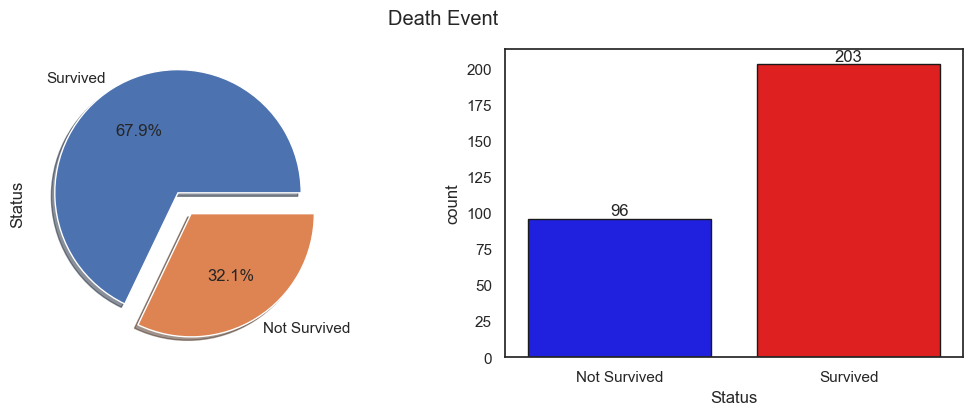

In [12]:


sns.set(style='white')

fig, axes = plt.subplots(1, 2, figsize=(13, 4))

plt.subplot(1, 2, 1)
df['Status'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True)

plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x='Status', palette=colors, edgecolor='k')
ax.bar_label(ax.containers[0])

plt.suptitle('Death Event')


In [13]:
def catplot(df, x): 
    sns.set(style='white')
    fig = plt.subplots(1, 3, figsize=(15, 4))
    plt.subplot(1, 3, 1)
    df[x].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True)  # Removed 'text' parameter

    plt.subplot(1, 3, 2)
    ax = sns.histplot(data=df, x=x, kde=True, color=colors[0], edgecolor='k')
    ax.bar_label(ax.containers[0])

    plt.subplot(1, 3, 3)
    ax = sns.countplot(data=df, x=x, hue='Status', palette=colors, edgecolor='k')
    for container in ax.containers:
        ax.bar_label(container)
    tit = x + ' vs Death Event'
    plt.suptitle(tit)


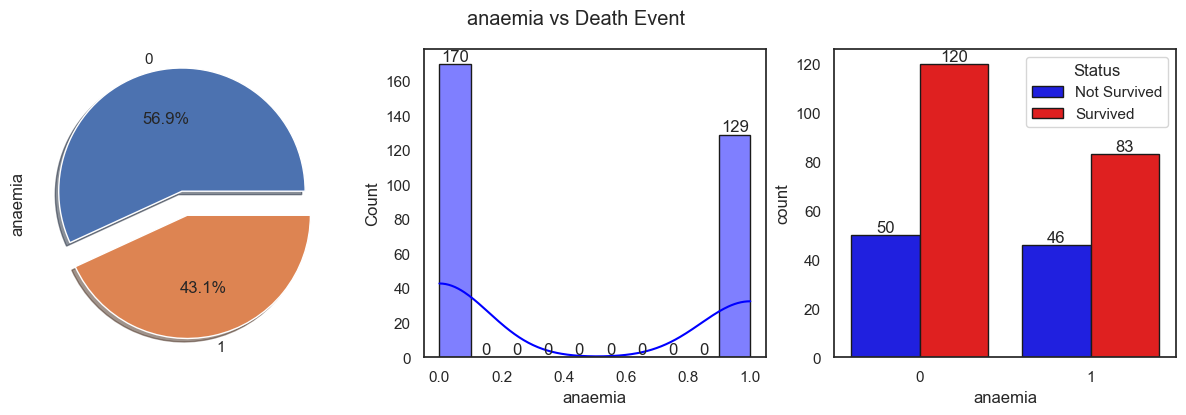

In [14]:
catplot(df,'anaemia')

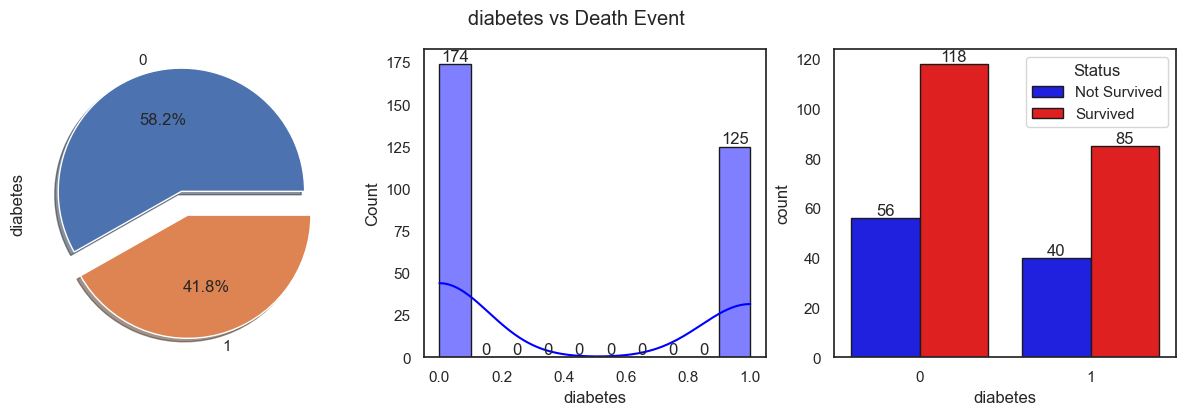

In [15]:
catplot(df,'diabetes')

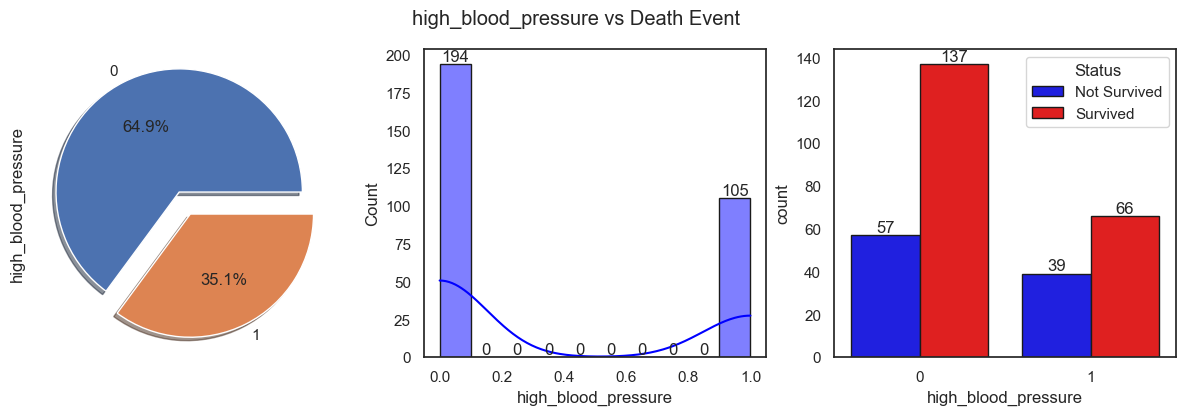

In [16]:
catplot(df,'high_blood_pressure')

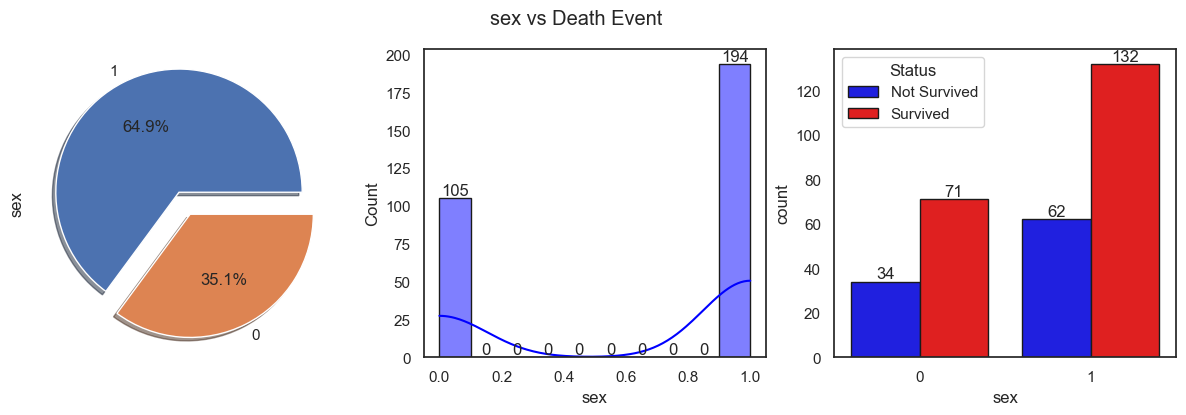

In [17]:
catplot(df,'sex')

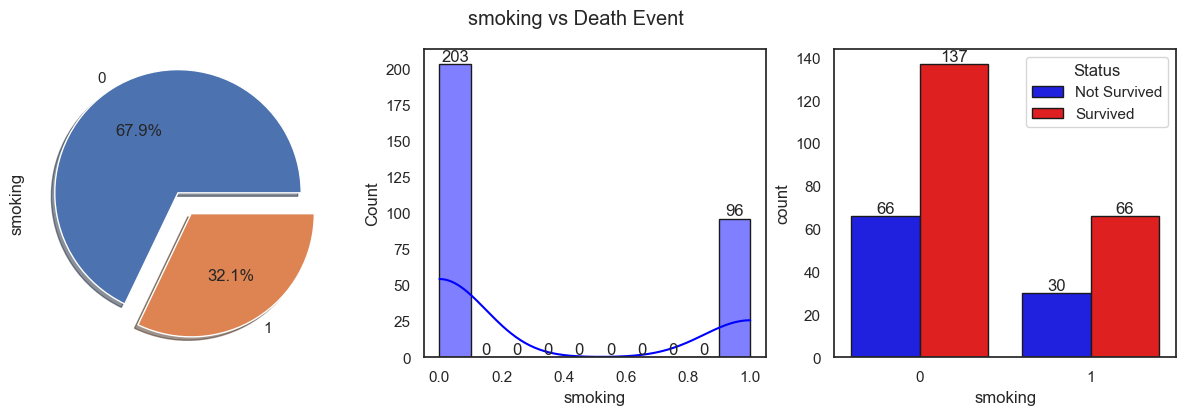

In [18]:
catplot(df,'smoking')


In [19]:
def numplot(df,x,scale): 
    sns.set(style='whitegrid')
    fig = plt.subplots(2,1,figsize = (15,11))
 
    plt.subplot(2,1,1)
    ax=sns.histplot(data=df, x=x, kde=True,color=colors[0],edgecolor = 'k')
    ax.bar_label(ax.containers[0])
    tit=x + ' distribution'
    plt.title(tit)
    
    plt.subplot(2,1,2)
    tar=x + '_group'
    Tstr= str(scale)
    tit2=x + ' vs Death Event ( ' + Tstr + ' : 1 )'
    df[tar] = [ int(i / scale) for i in df[x]]
    ax=sns.countplot(data=df, x=tar, hue='Status',palette = colors,edgecolor = 'k')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(tit2)


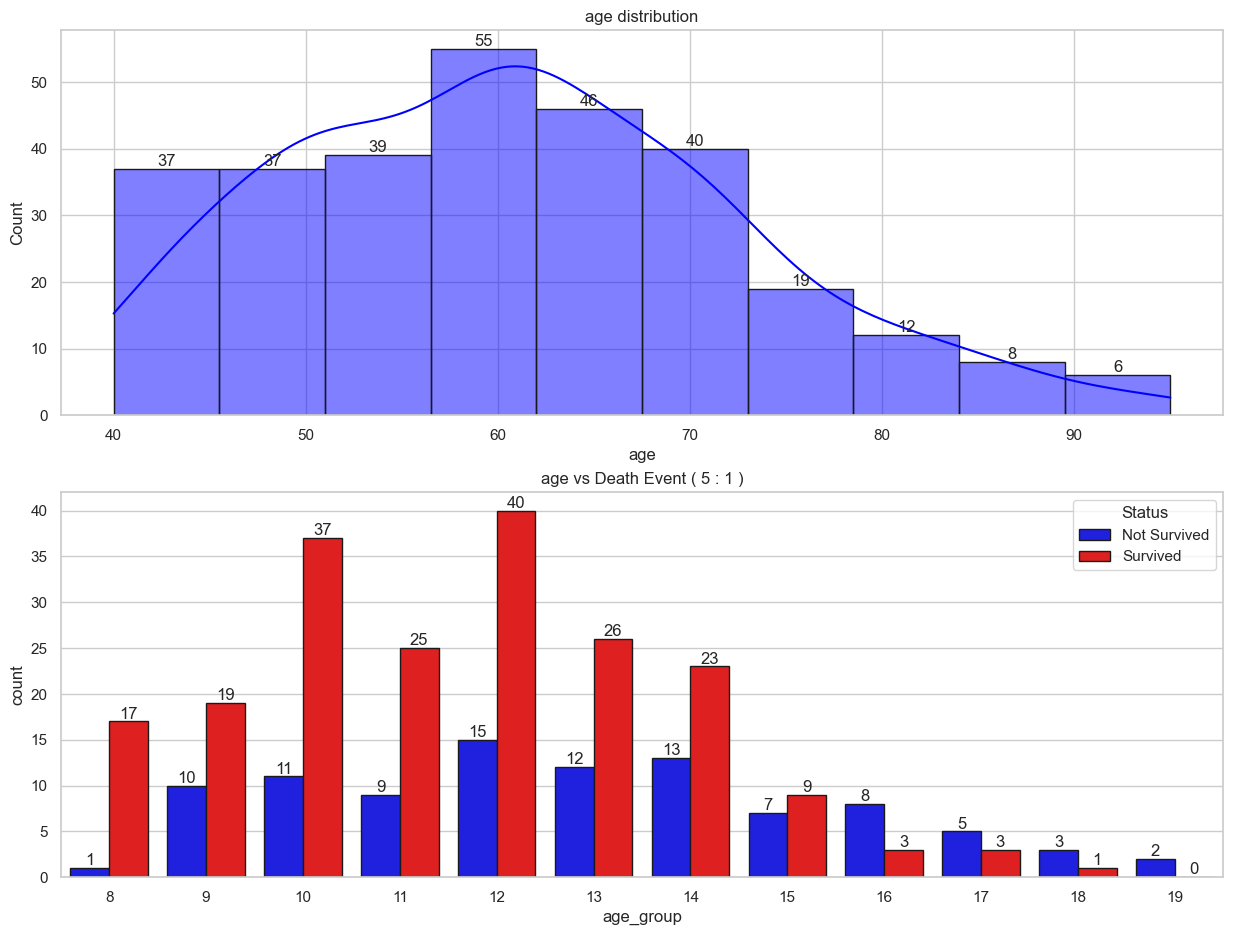

In [20]:
numplot(df,'age',5)

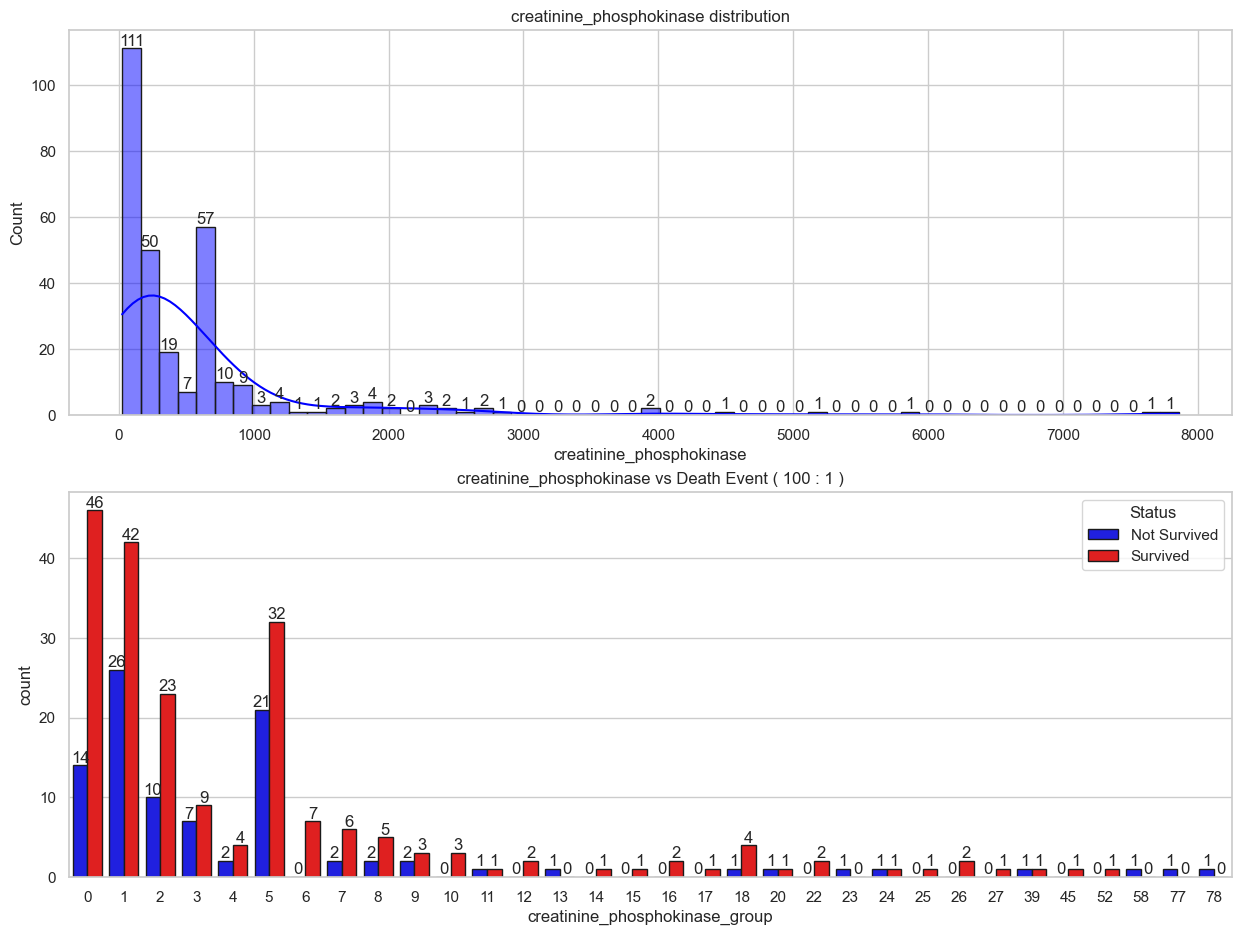

In [21]:
numplot(df,'creatinine_phosphokinase',100)

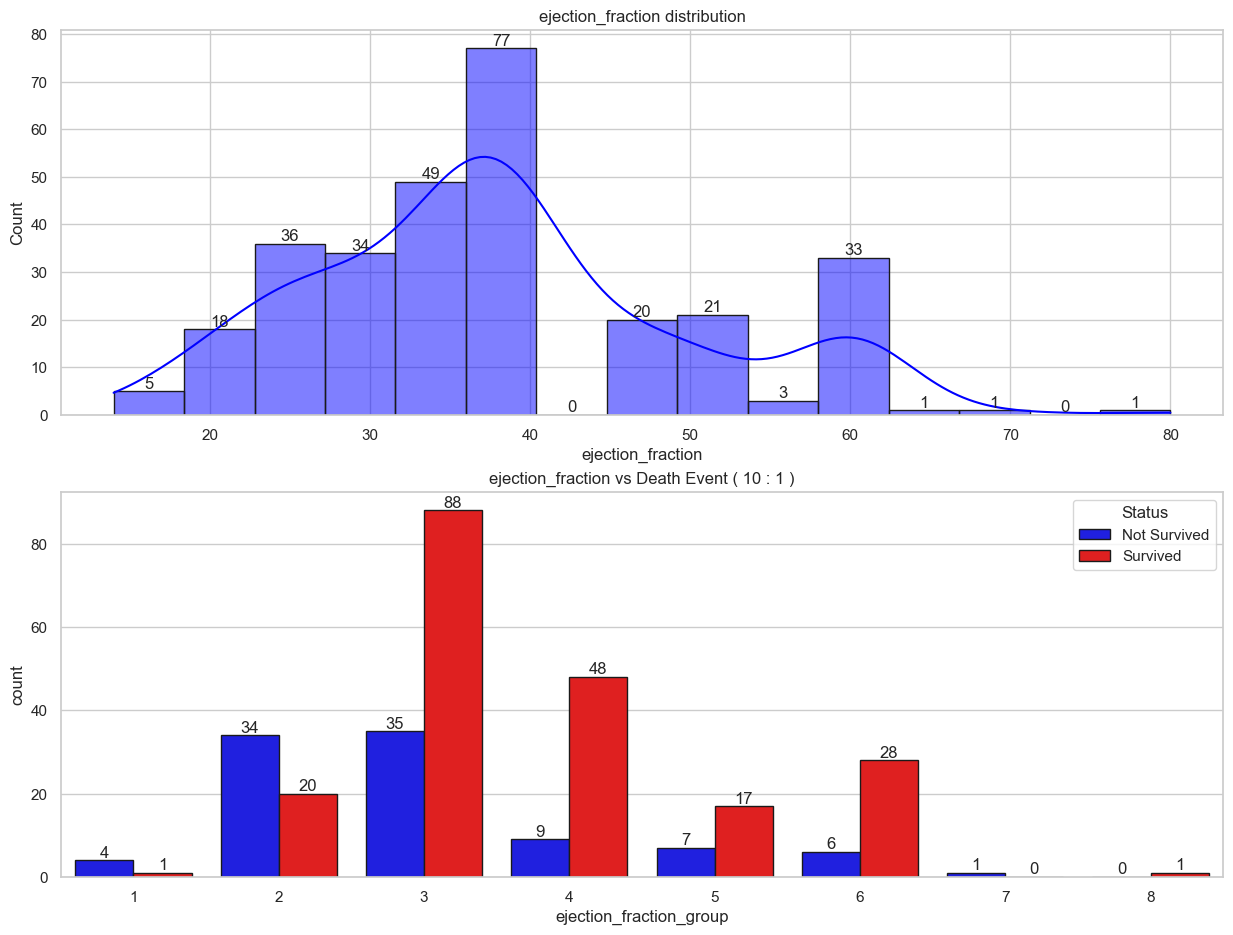

In [22]:
numplot(df,'ejection_fraction',10)

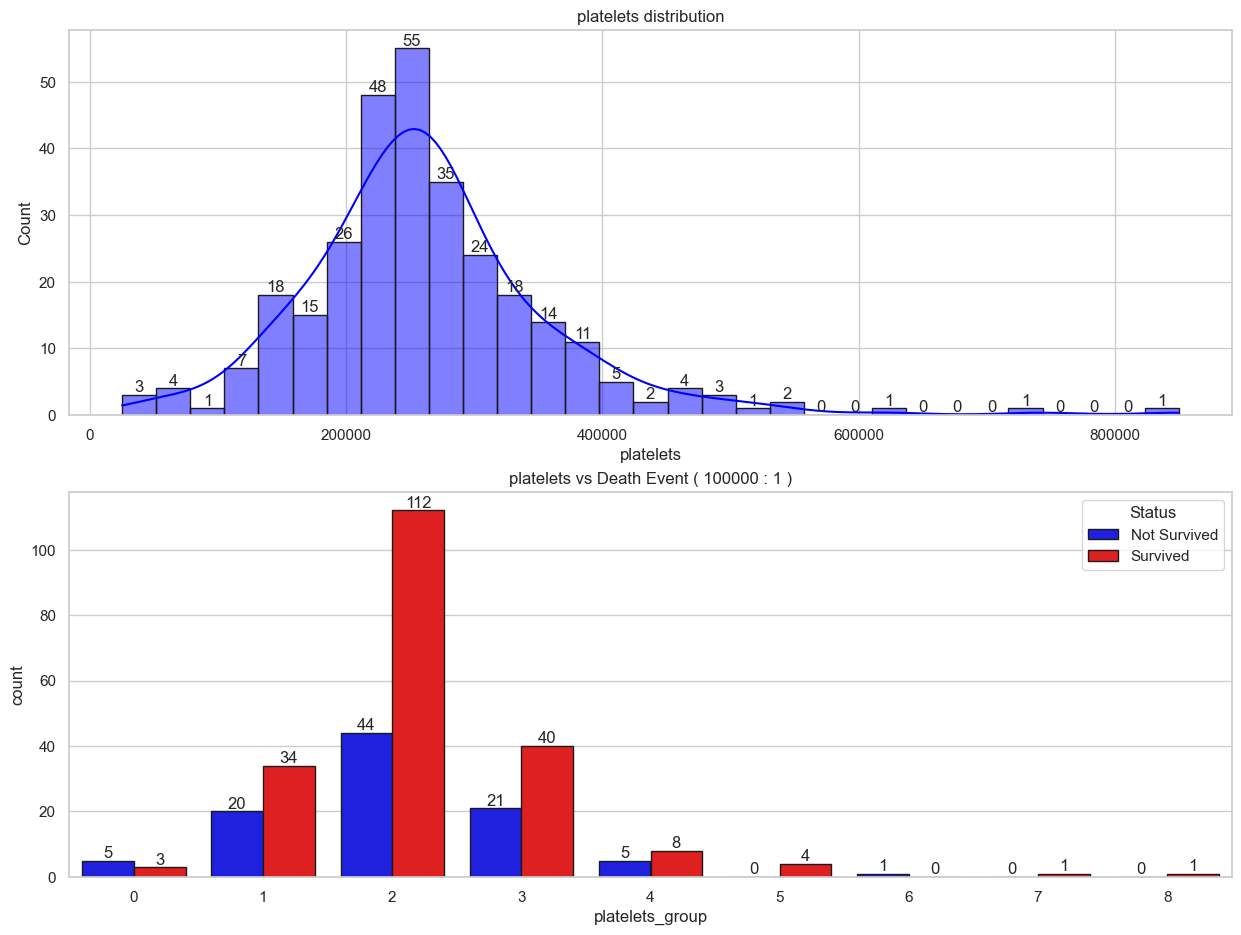

In [23]:
numplot(df,'platelets',10**5)

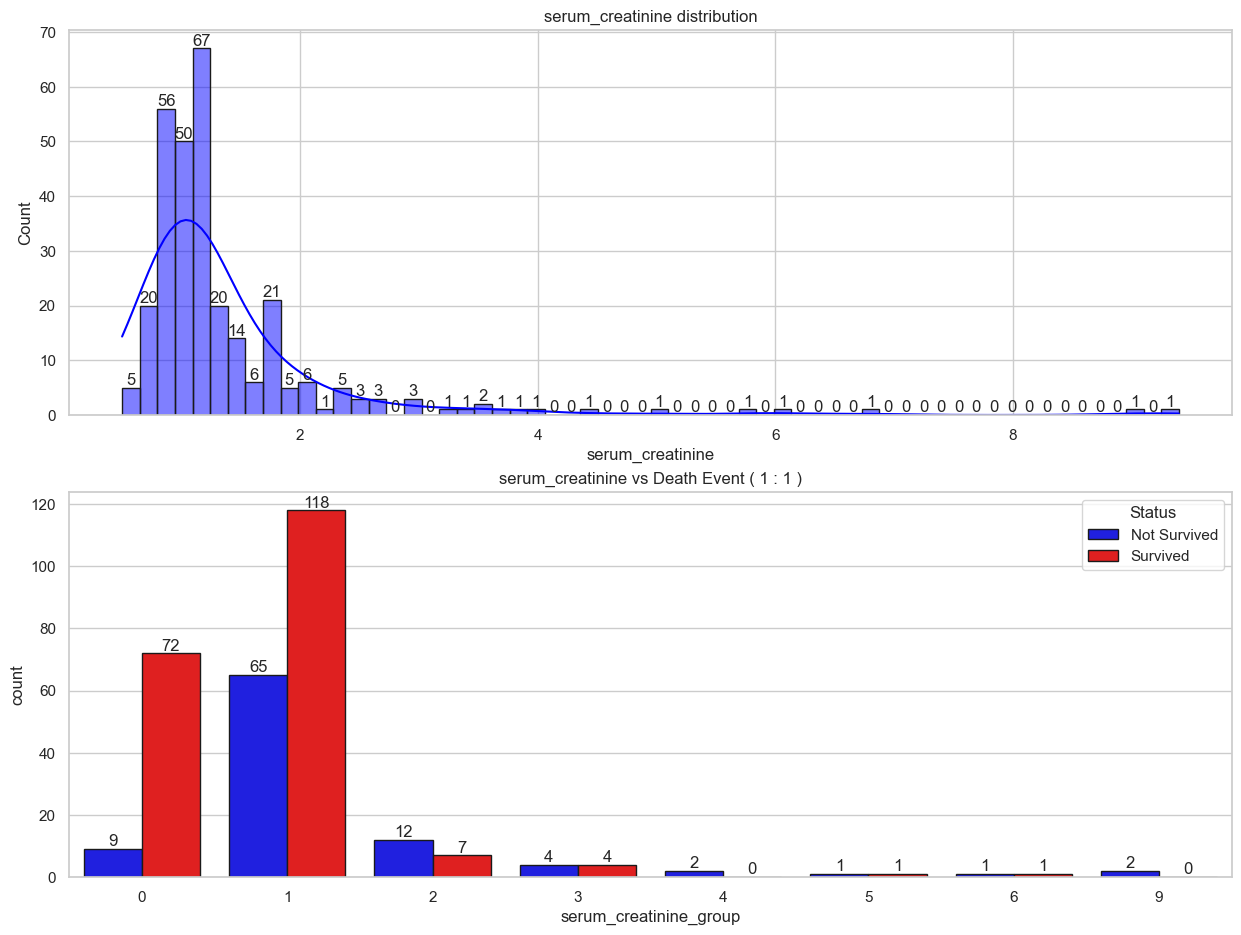

In [24]:
numplot(df,'serum_creatinine',1)

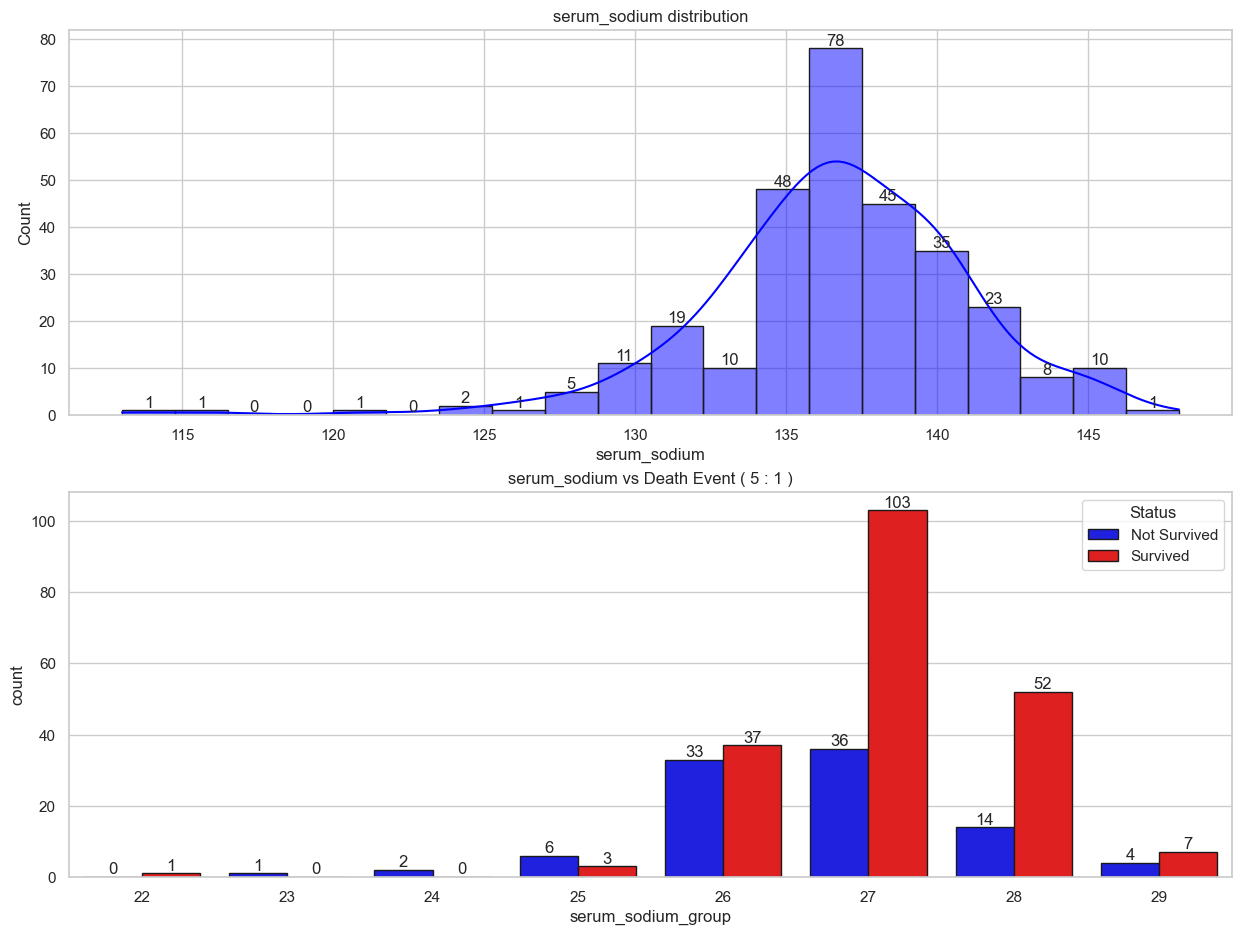

In [25]:
numplot(df,'serum_sodium',5)

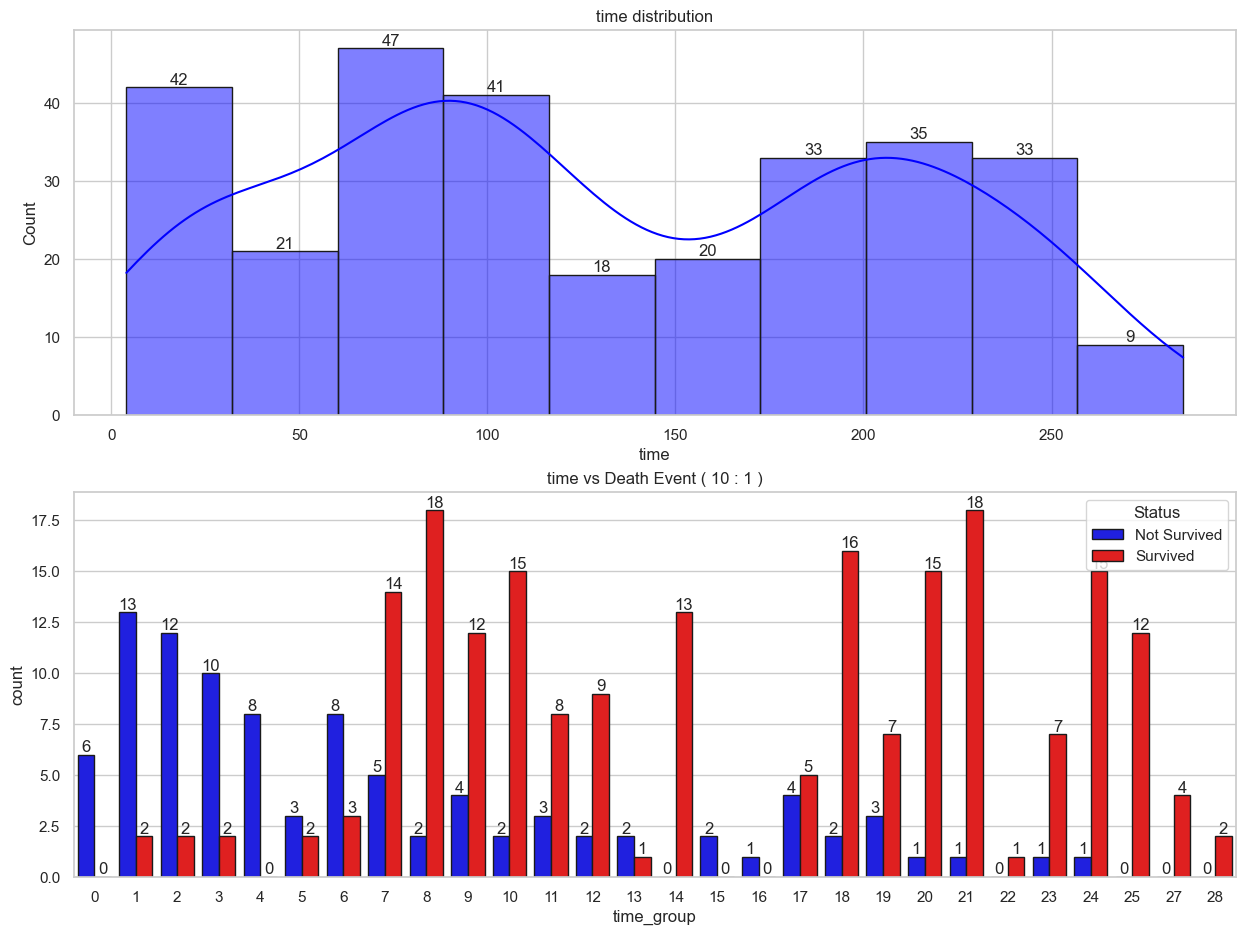

In [26]:
numplot(df,'time',10)

In [27]:
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization
# Normalization
df['age'] = mms.fit_transform(df[['age']])
df['creatinine_phosphokinase'] = mms.fit_transform(df[['creatinine_phosphokinase']])
df['ejection_fraction'] = mms.fit_transform(df[['ejection_fraction']])
df['serum_creatinine'] = mms.fit_transform(df[['serum_creatinine']])
df['time'] = mms.fit_transform(df[['time']])
# Standardization
df['platelets'] = ss.fit_transform(df[['platelets']])
df['serum_sodium'] = ss.fit_transform(df[['serum_sodium']])
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,time,DEATH_EVENT,Status,age_group,creatinine_phosphokinase_group,ejection_fraction_group,platelets_group,serum_creatinine_group,serum_sodium_group,time_group
0,0.636364,0,0.071319,0,0.090909,1,1.681651e-02,0.157303,-1.504036,1,...,0.000000,1,Not Survived,15,5,2,2,1,26,0
1,0.272727,0,1.000000,0,0.363636,0,-2.740240e-07,0.067416,-0.141976,1,...,0.007117,1,Not Survived,11,78,3,2,1,27,0
2,0.454545,0,0.015693,0,0.090909,0,-1.038073e+00,0.089888,-1.731046,1,...,0.010676,1,Not Survived,13,1,2,1,1,25,0
3,0.181818,1,0.011227,0,0.090909,0,-5.464741e-01,0.157303,0.085034,1,...,0.010676,1,Not Survived,10,1,2,2,1,27,0
4,0.454545,1,0.017479,1,0.090909,0,6.517986e-01,0.247191,-4.682176,0,...,0.014235,1,Not Survived,13,1,2,3,2,23,0


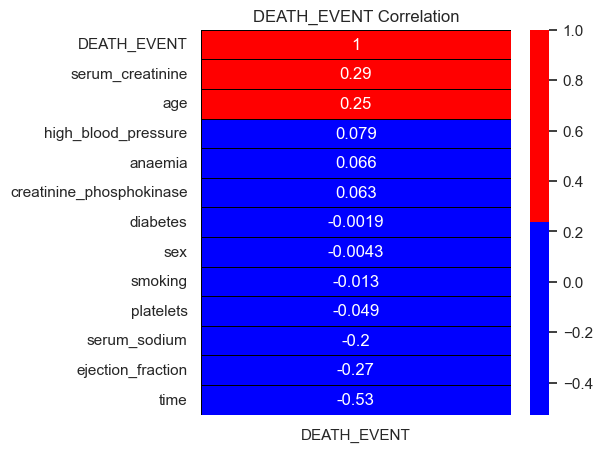

In [28]:
corr = data.corrwith(data['DEATH_EVENT']).sort_values(ascending = False).to_frame()
corr.columns = ['DEATH_EVENT']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('DEATH_EVENT Correlation');

In [34]:
df1=data.copy()
df2=data.copy()

# Dataset for model based on Statistical Test :
df1 = df1.drop(columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking','creatinine_phosphokinase', 'platelets'])
# Dataset for model based on General Information :
                          
df2 = df2.drop(columns=['sex', 'platelets'])


In [36]:
over = SMOTE()
f1 = df1.iloc[:,:5].values
t1 = df1.iloc[:,5].values
f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({1: 203, 0: 203})

In [37]:
over = SMOTE()
f2 = df2.iloc[:,:10].values
t2 = df2.iloc[:,10].values
f2, t2 = over.fit_resample(f2, t2)
Counter(t2)



Counter({1: 203, 0: 203})

In [54]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size=0.15, random_state=0)
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size=0.15, random_state=0)


In [55]:
def model(classifier,x_train,y_train,x_test,y_test):
    sns.set(rc={'figure.figsize':(5,3)})
    sns.set(style='whitegrid')
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    cross_val_scores = cross_val_score(classifier, x_train, y_train, cv=cv)
    mean_cross_val_score = cross_val_scores.mean()

    print("Cross Validation Score:", '{0:.2%}'.format(mean_cross_val_score))
    #print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
 # plot_roc_curve(classifier, x_test,y_test)
    RocCurveDisplay.from_estimator(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()
                                                                       
def model_evaluation(classifier,x_test,y_test):
 
 # Confusion Matrix
   cm = confusion_matrix(y_test,classifier.predict(x_test))
   names = ['True Neg','False Pos','False Neg','True Pos']
   counts = [value for value in cm.flatten()]
   percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
   labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
   labels = np.asarray(labels).reshape(2,2)
   sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
 
 # Classification Report
   print(classification_report(y_test,classifier.predict(x_test)))

Cross Validation Score: 85.90%
ROC_AUC Score :  90.37%


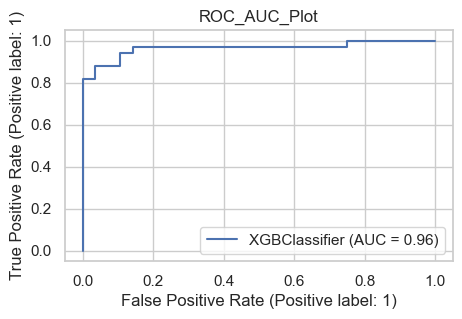

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        28
           1       0.94      0.88      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



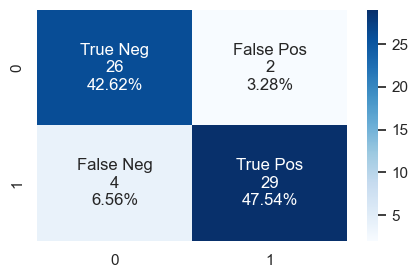

In [56]:
classifier_xgb = XGBClassifier(random_state=1)

model(classifier_xgb,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_xgb,x_test1,y_test1)

Cross Validation Score: 88.22%
ROC_AUC Score :  88.31%


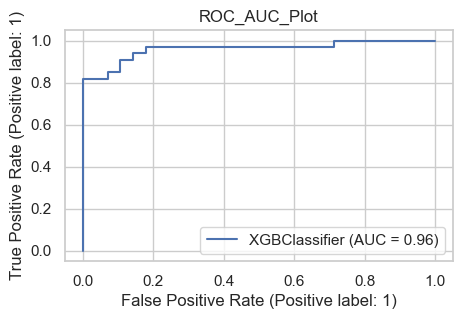

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



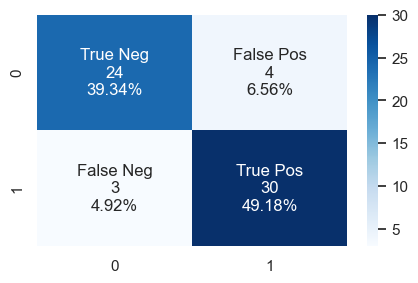

In [57]:
model(classifier_xgb,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_xgb,x_test2,y_test2)

Cross Validation Score: 86.96%
ROC_AUC Score :  87.07%


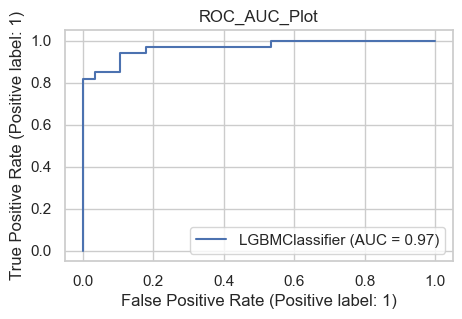

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.90      0.85      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



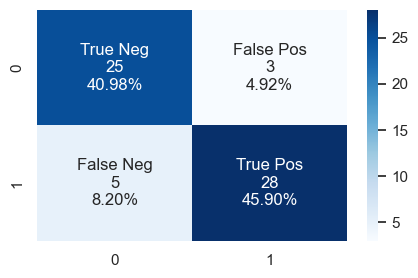

In [58]:
classifier_lgbm = LGBMClassifier(random_state=1)
model(classifier_lgbm,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lgbm,x_test1,y_test1)

Cross Validation Score: 87.86%
ROC_AUC Score :  88.31%


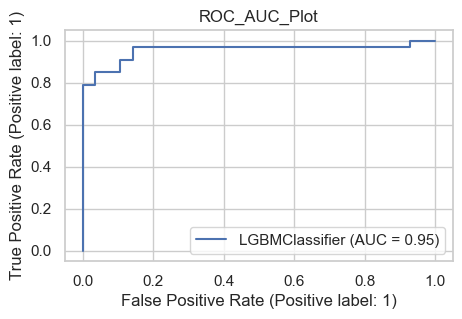

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



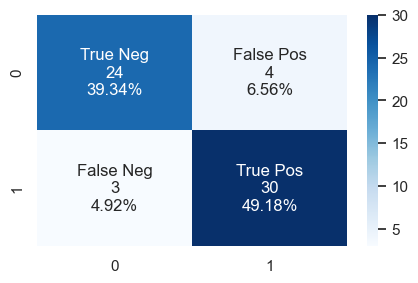

In [59]:
model(classifier_lgbm,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lgbm,x_test2,y_test2)

Cross Validation Score: 78.94%
ROC_AUC Score :  88.04%


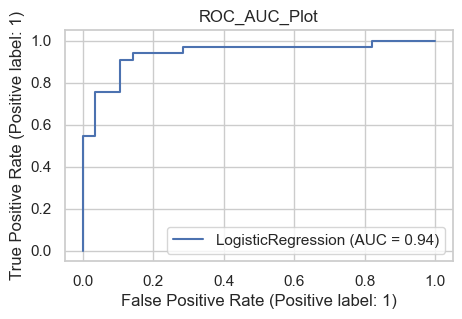

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.86      0.94      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



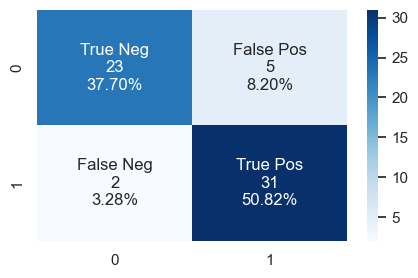

In [60]:
classifier_lr = LogisticRegression(random_state = 1) 
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lr,x_test1,y_test1)

Cross Validation Score: 79.24%
ROC_AUC Score :  86.26%


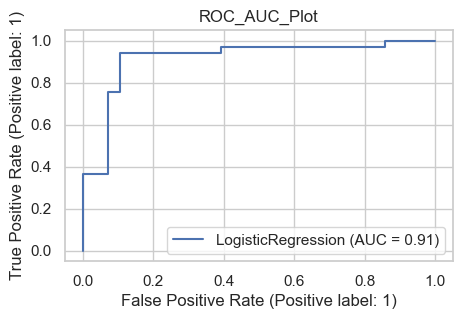

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



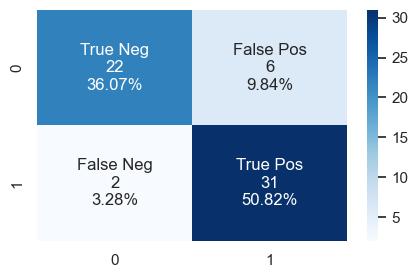

In [61]:
model(classifier_lr,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lr,x_test2,y_test2)

Cross Validation Score: 80.20%
ROC_AUC Score :  85.82%


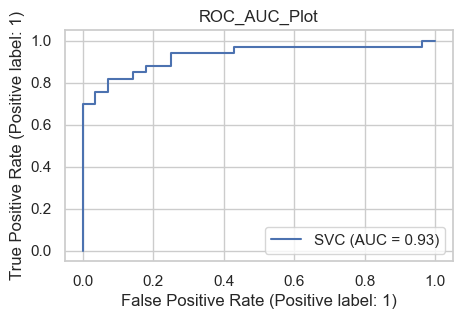

              precision    recall  f1-score   support

           0       0.79      0.93      0.85        28
           1       0.93      0.79      0.85        33

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



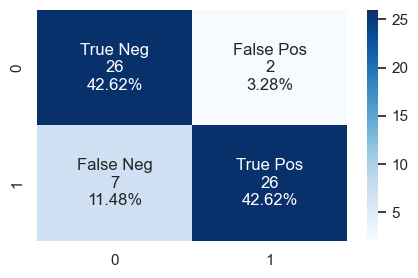

In [62]:
classifier_svc = SVC()
model(classifier_svc,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_svc,x_test1,y_test1)

Cross Validation Score: 70.95%
ROC_AUC Score :  70.29%


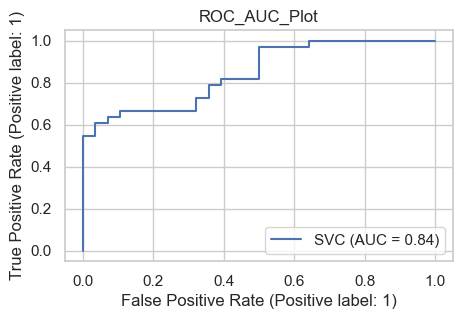

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        28
           1       0.73      0.73      0.73        33

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61



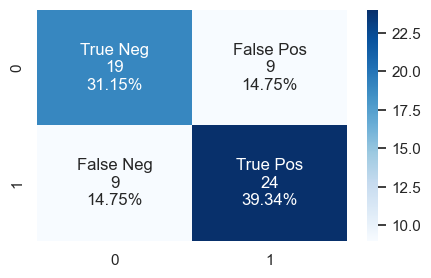

In [63]:
model(classifier_svc,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_svc,x_test2,y_test2)

Cross Validation Score: 85.51%
ROC_AUC Score :  90.37%


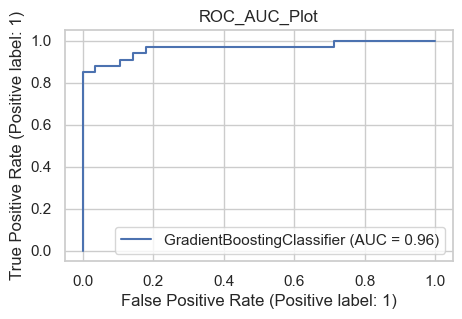

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        28
           1       0.94      0.88      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



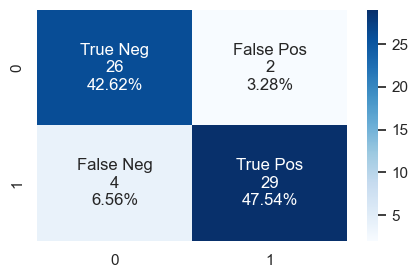

In [64]:
classifier_grad = GradientBoostingClassifier(random_state=1)
model(classifier_grad,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_grad,x_test1,y_test1)

Cross Validation Score: 70.95%
ROC_AUC Score :  70.29%


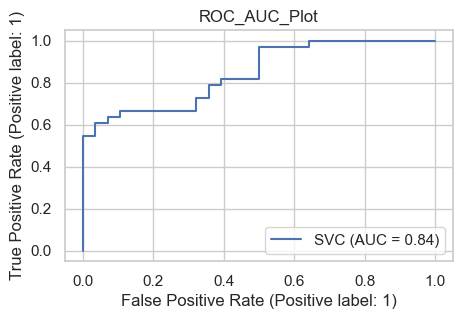

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        28
           1       0.73      0.73      0.73        33

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61



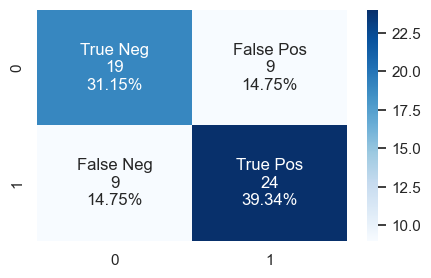

In [65]:
model(classifier_svc,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_svc,x_test2,y_test2)

Cross Validation Score: 86.67%
ROC_AUC Score :  93.40%


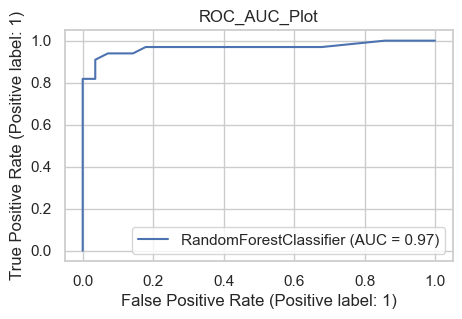

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.94      0.94      0.94        33

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



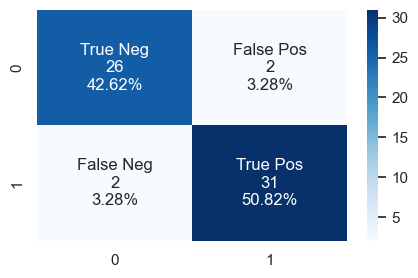

In [66]:
classifier_rdf = RandomForestClassifier(random_state=1)
model(classifier_rdf,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_rdf,x_test1,y_test1)

Cross Validation Score: 70.95%
ROC_AUC Score :  70.29%


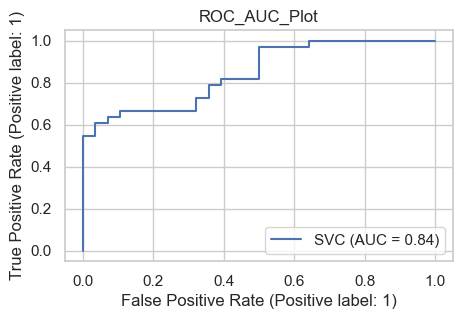

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        28
           1       0.73      0.73      0.73        33

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61



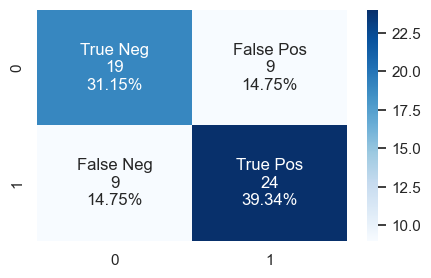

In [67]:
model(classifier_svc,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_svc,x_test2,y_test2)

In [68]:
pip install flaml

     ---------------------------------------- 0.0/260.5 kB ? eta -:--:--
     ----- ------------------------------- 41.0/260.5 kB 653.6 kB/s eta 0:00:01
     -------------------- ----------------- 143.4/260.5 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 260.5/260.5 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [71]:
from flaml import AutoML
automl = AutoML()

In [72]:
classifier_lgbm = LGBMClassifier(colsample_bytree=0.26649620250942635,
              learning_rate=0.02058909150877934, max_bin=127,
              min_child_samples=7, n_estimators=184, num_leaves=48,
              reg_alpha=0.004090180440029941, reg_lambda=0.0009765625,
              verbose=-1)

Cross Validation Score: 85.35%
ROC_AUC Score :  92.15%


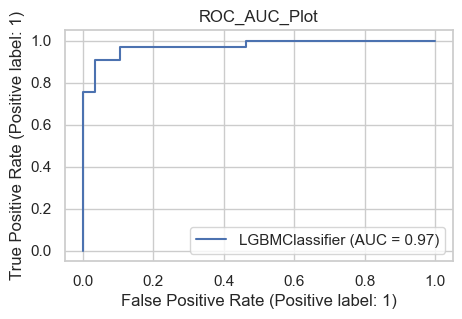

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.97      0.88      0.92        33

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



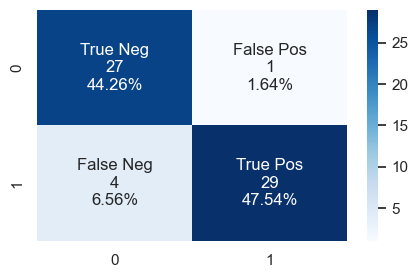

In [73]:
model(classifier_lgbm,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lgbm,x_test1,y_test1)

Cross Validation Score: 88.14%
ROC_AUC Score :  95.18%


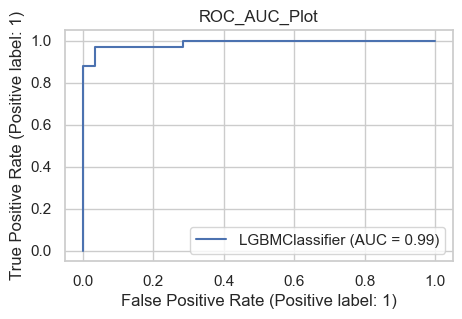

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.97      0.94      0.95        33

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61



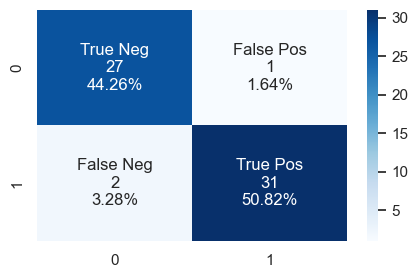

In [74]:
model(classifier_lgbm,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lgbm,x_test2,y_test2)

In [ ]:
The Final Results:
After using flaml, the results of both datasets improved